In [43]:
from matplotlib import pyplot as plt
import pandas as pd
from prophet import Prophet
import numpy as np

In [44]:
# Read database
input_path = '../Predictive_Maintenance_free_dataset/Datasets/dataset_TPV/base_pump_23042023_A_resampled_1min/base_pump_23042023_A_resampled_1min.csv'     # INPUT
df = pd.read_csv(input_path)
feature = 'OutletPressure'

df = df[['Time', feature]]
df['Time'] = pd.to_datetime(df['Time'])
df.rename(columns={'Time' : 'ds', feature : 'y'}, inplace=True)

# df = df[df['ds'].dt.hour < 6]

In [45]:
# Split train and test data

# Use it to select future window in frames
n_obs = 144*70       # Window forecast for 7 day. (1 frame = 1 min.)

# Use it to normalize data
# X_train, X_test = normalized_df[0:-n_obs], normalized_df[-n_obs:]
# X_train, X_test = normalized_df[0:-n_obs], normalized_df[-n_obs:]

# Use it to DO NOT normalize data
X_train, X_test = df[0:-n_obs], df[-n_obs:]
# X_train, X_test = df[0:-n_obs], df[-n_obs:]

In [46]:
# Using prophet (fit process)

prof = Prophet()
prof.fit(X_train)

08:30:09 - cmdstanpy - INFO - Chain [1] start processing
08:30:21 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# Make future
# period = df.shape[0] + 144*70  # INPUT
# # freq_ = pd.to_timedelta(df['ds'][1] - df['ds'][0])
# freq_ = '60S'

# future = prof.make_future_dataframe(periods=period, freq=freq_)
# print(future.tail())


# print("Input data total interval: ", end='')
# print(pd.to_timedelta(df['ds'][df['ds'].last_valid_index()] - df['ds'][0]))
# print("Input data number of samples: ", end='')
# print(df['ds'].last_valid_index())
# print("Input data period: ", end='')
# print(pd.to_timedelta(df['ds'][1] - df['ds'][0]))

# print("#########")

# print("Predict total interval: ", end='')
# print(pd.to_timedelta(future['ds'][future['ds'].last_valid_index()] - future['ds'][0]))
# print("Predict number of samples: ", end='')
# print(future['ds'].last_valid_index())
# print("Predict data period: ", end='')
# print(pd.to_timedelta(future['ds'][1] - future['ds'][0]))

In [48]:
# print("Input data total interval: ", end='')
# print(pd.to_timedelta(X_test['ds'][X_test['ds'].last_valid_index()] - X_test['ds'][0]))
# print("Input data number of samples: ", end='')
# print(X_test['ds'].last_valid_index())
# print("Input data period: ", end='')
# print(pd.to_timedelta(X_test['ds'][1] - X_test['ds'][0]))

# print("#########")

# print("Predict total interval: ", end='')
# print(pd.to_timedelta(X_train['ds'][X_train['ds'].last_valid_index()] - X_train['ds'][0]))
# print("Predict number of samples: ", end='')
# print(X_train['ds'].last_valid_index())
# print("Predict data period: ", end='')
# print(pd.to_timedelta(X_train['ds'][1] - X_train['ds'][0]))

In [49]:
X_test_2 = X_test.copy()

future = pd.DataFrame({"ds":X_test_2['ds'].tolist()})

In [50]:
# Forecast
forecast = prof.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast['yhat'].tail()

10075    24.232894
10076    22.510527
10077    20.787706
10078    19.064526
10079    17.341078
Name: yhat, dtype: float64

In [51]:
# # Full sized plot image
# plt.figure()
# fig_plot_full = prof.plot(forecast)
# # plt.plot_date()
# # plt.show
# # Detailed plot image
# fig_plot = prof.plot(forecast)
# plt.ylim(-10,10) # INPUT: Detailed image config
# plt.xlim(pd.Timestamp('2023-04-04')) # INPUT: Detailed image config
# # Trend plot image
# fig_trend = prof.plot_components(forecast)


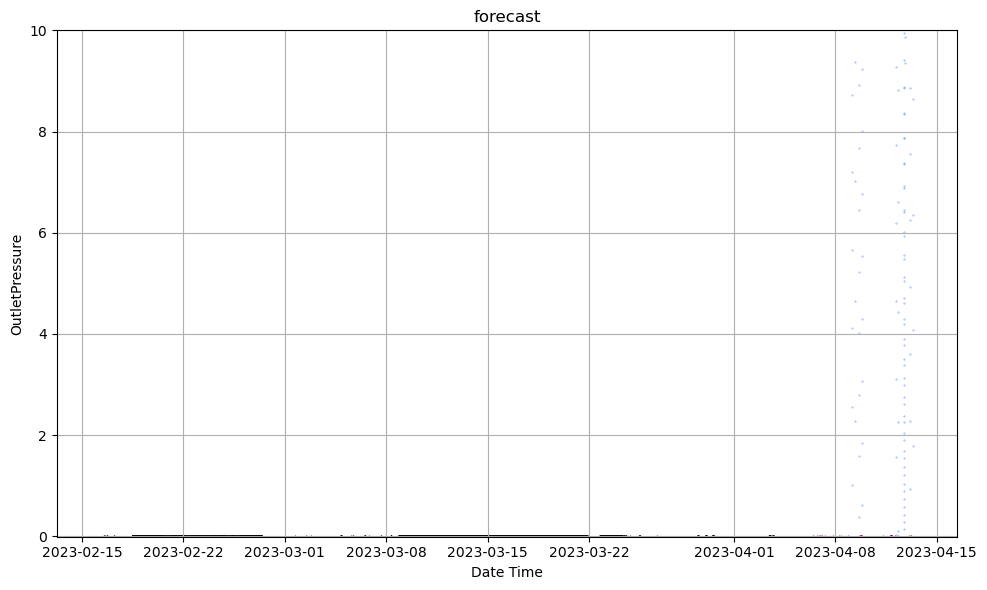

<Figure size 1000x600 with 0 Axes>

In [64]:
# Plot image

x_axis = 'Date Time'
y_axis = feature
title = 'forecast'
length_circle = 0.1

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.autolayout"] = True
plt.scatter(forecast['ds'], forecast['yhat'], s=length_circle, color="cornflowerblue", label="Regression")
plt.scatter(X_test['ds'], X_test['y'], s=length_circle, color="purple", label="Test Real")
plt.scatter(X_train['ds'], X_train['y'], s=length_circle, color="black", label="Real")
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title(title)
plt.ylim(-.01, 10)
plt.grid(True)
plt.show()
plt.savefig(f'output_prophet/forecast_{feature}.png')

In [53]:
# Plot ground truth

# plt.figure().set_figwidth(20)
# plt.plot_date(X_test['ds'], X_test['y'])

In [54]:
# Save generated databse in a file (csv)
# import os

# head, tail = os.path.split(input_path)
# out_filename = 'output/generated_' + tail
# out_path = os.path.join(head, out_filename)

# if not(os.path.exists(os.path.join(head, 'output'))):
#     os.mkdir(os.path.join(head, 'output'))

# forecast.to_csv(out_path)

# print("Finished...")
# print("Exporting database: " + out_path)

In [55]:
# Save plot images

# out_path_plot = os.path.join(head,"output/plot_" + os.path.splitext(tail)[0]+".png")
# out_path_plot_full = os.path.join(head,"output/plot_full_" + os.path.splitext(tail)[0]+".png")
# out_path_plot_trends = os.path.join(head,"output/trends_" + os.path.splitext(tail)[0]+".png")

# fig_plot.savefig(out_path_plot)
# fig_plot_full.savefig(out_path_plot_full)
# fig_trend.savefig(out_path_plot_trends)

# print("Saving plot images (full): " + out_path_plot_full)
# print("Saving plot images (detailed): " + out_path_plot)
# print("Saving plot images (trends): " + out_path_plot_trends)